In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data-export (1).csv')

In [4]:
df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [5]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group","DateHour", "Users", "Sessions", "Engaged sessions", "Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [6]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [8]:
df["DateHour"] = pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')

In [9]:
numeric_cols = df.columns.drop(["Channel Group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors = 'coerce')
df["Hours"] = df['DateHour'].dt.hour

In [10]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [11]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


## 📊📈 Q1. What patterns or trends can you observe in website sessions and users over time?
📅 In this section, we'll examine how website sessions and user activity fluctuate over time. By analyzing these trends, we can identify peak activity hours, low traffic periods, and overall audience behavior patterns.

✨ Why it matters:

* 🔍 Detect periods of high and low traffic

* 📊 Understand audience behavior changes

* 📌 Inform scheduling for content drops and campaigns

In [13]:
sns.set(style = "whitegrid")

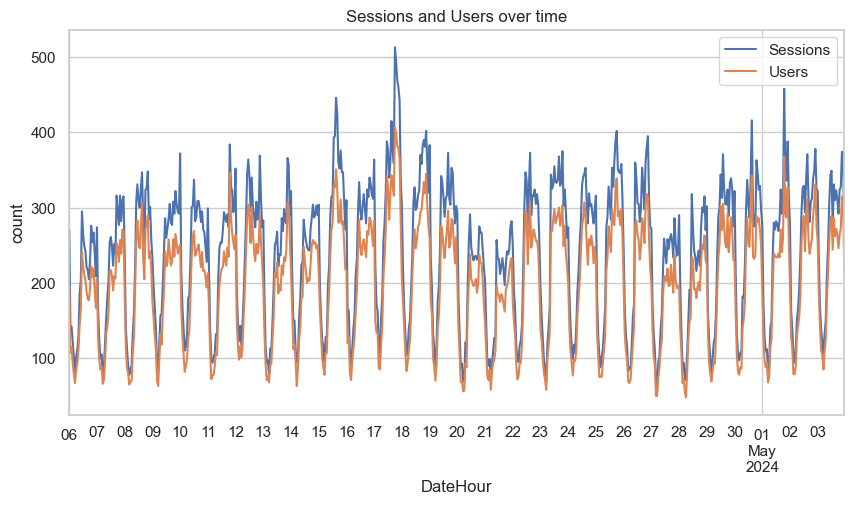

In [14]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

## 📣📊 Q2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?
🚀 This analysis identifies which marketing channel delivered the highest volume of users. Recognizing this helps us benchmark its strategies and apply those learnings to underperforming channels.

✨ Key Insights:

* 📈 Optimize underperforming channels

* 🎯 Focus marketing efforts where they convert best

* ⚙️ Balance traffic acquisition strategies efficiently

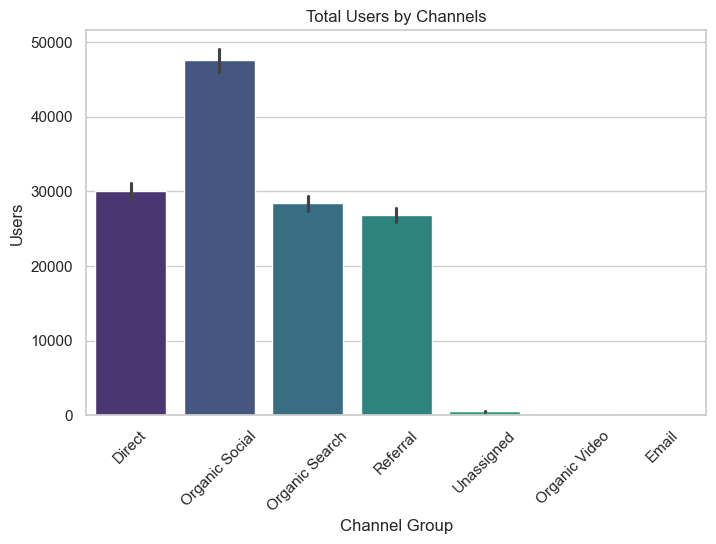

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x="Channel Group", 
    y="Users", 
    estimator=np.sum, 
    hue="Channel Group", 
    palette="viridis",
    legend=False
)
plt.title("Total Users by Channels")
plt.xticks(rotation=45)
plt.show()

## ⏱️📲 Q3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?
🕒 This insight highlights which traffic source retains users the longest. Longer engagement times suggest better content quality, relevance, or platform alignment.

✨ Why this matters:

* 👥 Identify sources attracting quality audiences

* 📚 Refine platform-specific content strategies

* 🖥️ Enhance user experience and content effectiveness

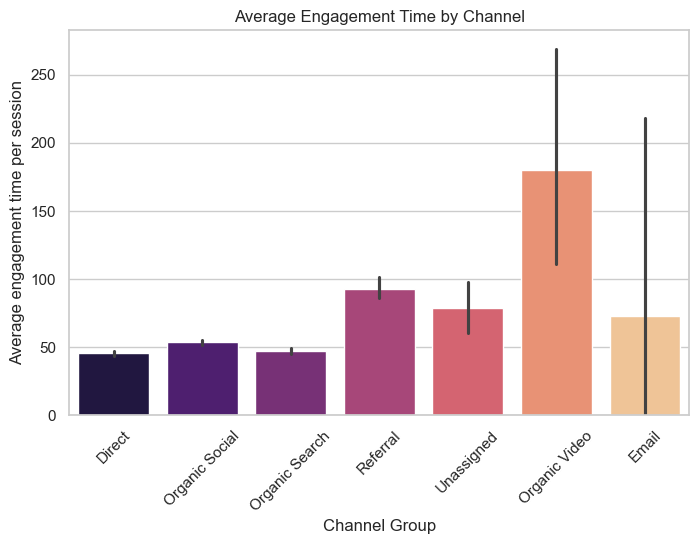

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x="Channel Group", 
    y="Average engagement time per session", 
    estimator=np.mean, 
    hue="Channel Group", 
    palette="magma", 
    legend=False
)
plt.title("Average Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

## 🎛️📉 Q4. How does engagement rate vary across different traffic channels?
📊 Engagement rates aren't equal across channels. This section helps determine which traffic sources generate the most engaged interactions versus casual visits.

✨ Key Takeaways:

* 📏 Measure quality vs. quantity trade-offs

* 🖍️ Spot underperforming channels

* 🎨 Adjust targeting and content for better engagement

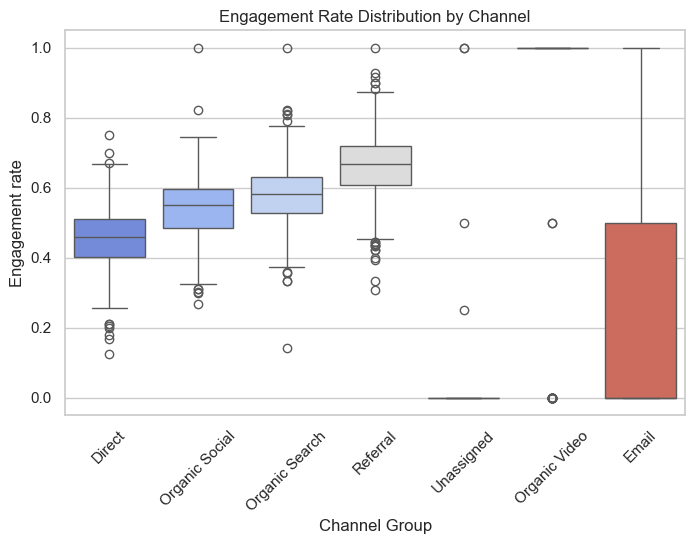

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df, 
    x="Channel Group", 
    y="Engagement rate", 
    hue="Channel Group", 
    palette="coolwarm", 
    legend=False
)
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

## ⚖️📊 Q5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?
📈 By comparing engaged vs. non-engaged sessions for each channel, we’ll assess which sources offer meaningful audience interactions and which need improvement.

✨ Insights and Actions:

* 🔎 Spot underperformers

* ✨ Apply successful tactics from top-performing channels

* 🎯 Boost weaker sources with tailored content, improved UX, and focused targeting

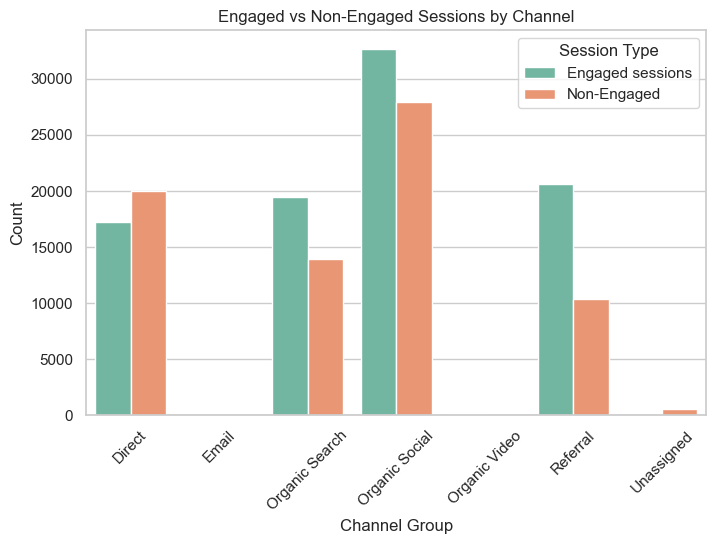

In [46]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged sessions"]].sum().reset_index()

session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]

session_df_melted = session_df.melt(
    id_vars="Channel Group",
    value_vars=["Engaged sessions", "Non-Engaged"],
    var_name="Session Type",
    value_name="Count"
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=session_df_melted, 
    x="Channel Group", 
    y="Count", 
    hue="Session Type", 
    palette="Set2"
)
plt.title("Engaged vs Non-Engaged Sessions by Channel")
plt.xticks(rotation=45)
plt.show()

## 🕰️📊 Q6. At what hours of the day does each channel drive the most traffic?
🕘 This section reveals which hours of the day see peak traffic for each channel. Visualized with a heatmap, this uncovers when users are most active by channel.

✨ Why it's useful:

* 📈 Optimize campaign timings

* 📅 Align content drops with audience peaks

* 📊 Understand platform-specific behavior patterns

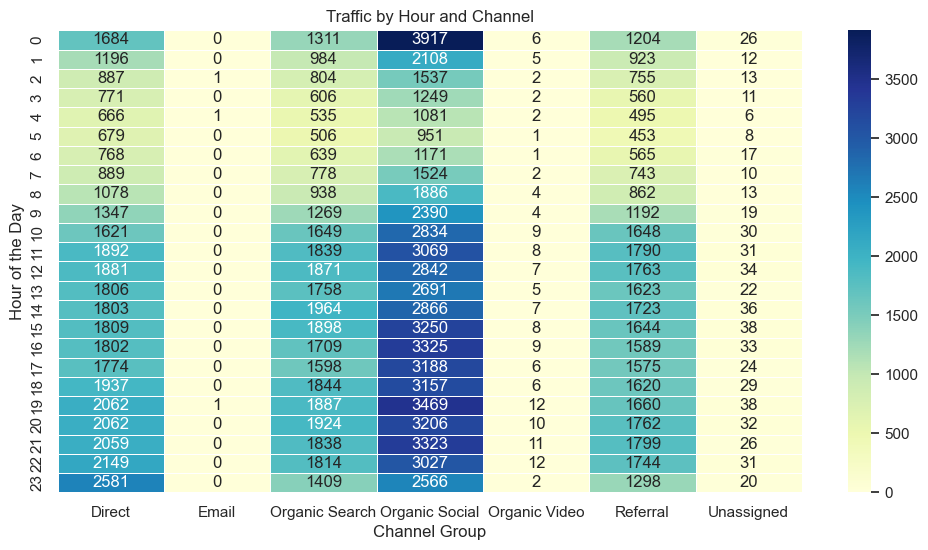

In [57]:
# Grouping data by Hours and Channel Group, summing the number of Sessions
heatmap_data = df.groupby(["Hours", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",        # Correct colormap name
    linewidth=.5,
    annot=True, 
    fmt='.0f'             # No decimal points in annotations
)

# Adding plot titles and labels
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of the Day")
plt.show()

## 🔗📉 Q7. Is there any correlation between high traffic (sessions) and high engagement rate over time?
📉 More traffic isn’t always better traffic. This analysis checks whether higher session counts correlate with improved engagement rates.

✨ What we learn:

* 📊 Evaluate traffic growth vs. engagement quality

* 📉 Identify traffic spikes with poor engagement

* 🎯 Refine strategies to balance volume and value

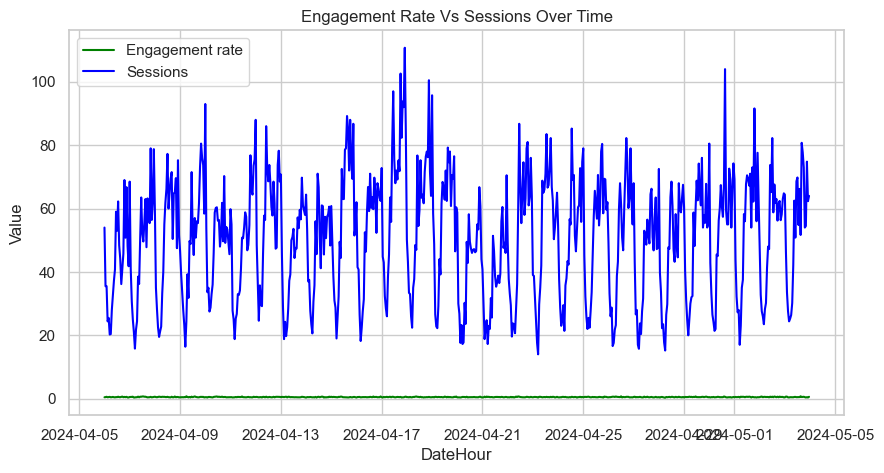

In [66]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate Vs Sessions Over Time")
plt.xlabel("DateHour")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## 📊📌 Conclusion & Key Insights
After analyzing the website’s performance data, here’s what we uncovered:

* 📣 Organic Social emerged as the top-performing marketing channel by total users, indicating it effectively drives traffic to the website.

* ⏱️ Organic Video proved to be the most engaging channel, recording both the highest average engagement time and the highest engagement rate — suggesting that video content successfully captures audience attention.

* 🕰️ The peak traffic hour across all channels was at 19:00 hrs, highlighting an opportunity to schedule campaigns and key content releases around this time for maximum reach.

* 📉 There was a weak positive correlation (+0.30) between the number of sessions and engagement rate. This implies that while traffic tends to slightly correlate with engagement, high traffic alone doesn’t guarantee higher engagement quality — reinforcing the need to focus on content relevance and audience targeting.